<a href="https://colab.research.google.com/github/jordan-dsouza/Projects/blob/main/Mobile_Price_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Saving kaggle.json to kaggle.json
100% 70.6k/70.6k [00:00<00:00, 201kB/s]
100% 70.6k/70.6k [00:00<00:00, 201kB/s]


In [2]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
sns.set()

In [3]:
!unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


#**Data:**

In [4]:
data = pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


1. battery_power: The battery capacity or power of the mobile phone.
2. blue: Whether the mobile phone has Bluetooth capability (binary: 0 for no, 1 for yes).
3. clock_speed: The clock speed or processor speed of the mobile phone.
4. dual_sim: Whether the mobile phone supports dual SIM cards (binary: 0 for no, 1 for yes).
5. fc: Front camera megapixels.
6. four_g: Whether the mobile phone supports 4G connectivity (binary: 0 for no, 1 for yes).
7. int_memory: Internal memory or storage capacity of the mobile phone (in gigabytes).
8. m_dep: Mobile depth in cm.
9. mobile_wt: Weight of the mobile phone in grams.
10. n_cores: Number of processor cores.
11. pc: Primary camera megapixels.
12. px_height: Pixel height of the mobile phone's display.
13. px_width: Pixel width of the mobile phone's display.
14. ram: RAM (Random Access Memory) capacity of the mobile phone (in megabytes).
15. sc_h: Screen height of the mobile phone in cm.
16. sc_w: Screen width of the mobile phone in cm.
17. talk_time: Talk time of the mobile phone in hours.
18. three_g: Whether the mobile phone supports 3G connectivity (binary: 0 for no, 1 for yes).
19. touch_screen: Whether the mobile phone has a touch screen (binary: 0 for no, 1 for yes).
20. wifi: Whether the mobile phone supports Wi-Fi connectivity (binary: 0 for no, 1 for yes).
21. price_range: The target variable you want to predict, which represents the price range of the mobile phone. This is what you'll be classifying.

All columns are numerical in nature.

In [5]:
#Null values:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

#**EDA:**

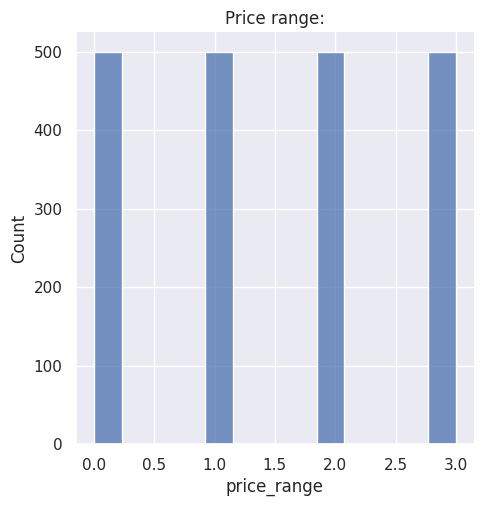

In [7]:
#Price range:
sns.displot(data["price_range"])
plt.title("Price range:")
plt.show()

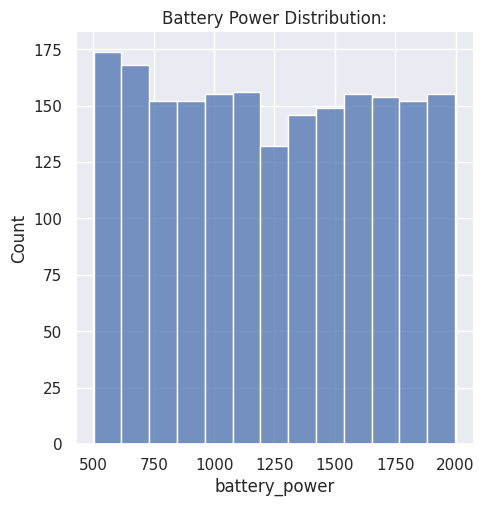

In [8]:
#Battery power:
sns.displot(data["battery_power"])
plt.title("Battery Power Distribution:")
plt.show()

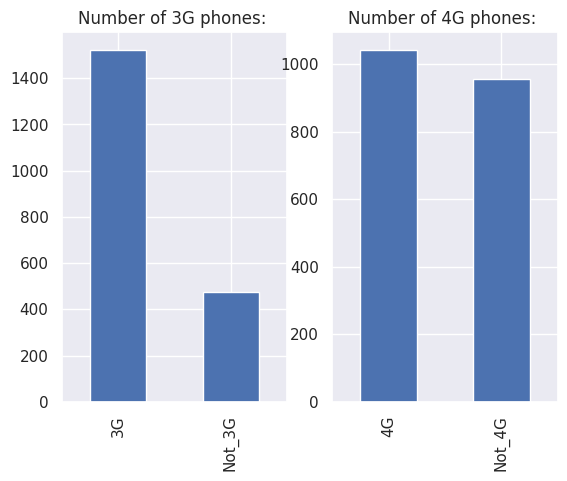

In [9]:
#Number of 3G phones and 4G phones:
plt.subplot(1,2,1)
data["three_g"].value_counts().plot(kind="bar")
plt.title("Number of 3G phones: ")
plt.xticks(ticks=(1,0),labels=["Not_3G","3G"]);
plt.subplot(1,2,2)
data["four_g"].value_counts().plot(kind="bar")
plt.title("Number of 4G phones: ")
plt.xticks(ticks=(1,0),labels=["Not_4G","4G"]);
plt.show()

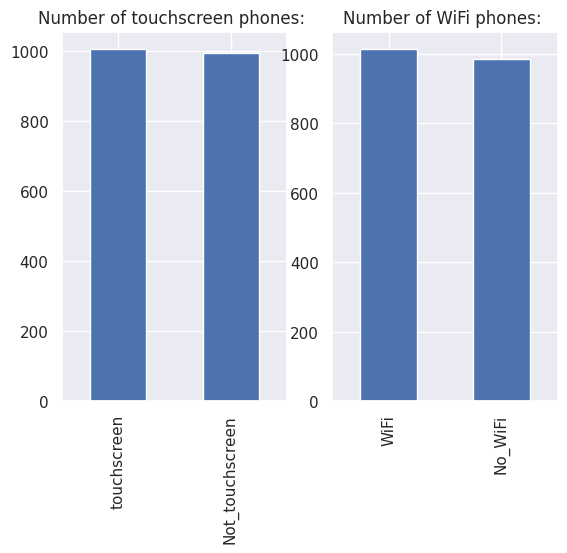

In [10]:
#Number of touch screen phones and wifi phones:
plt.subplot(1,2,1)
data["touch_screen"].value_counts().plot(kind="bar")
plt.title("Number of touchscreen phones: ")
plt.xticks(ticks=(1,0),labels=["Not_touchscreen","touchscreen"]);
plt.subplot(1,2,2)
data["wifi"].value_counts().plot(kind="bar")
plt.title("Number of WiFi phones: ")
plt.xticks(ticks=(1,0),labels=["No_WiFi","WiFi"]);
plt.show()

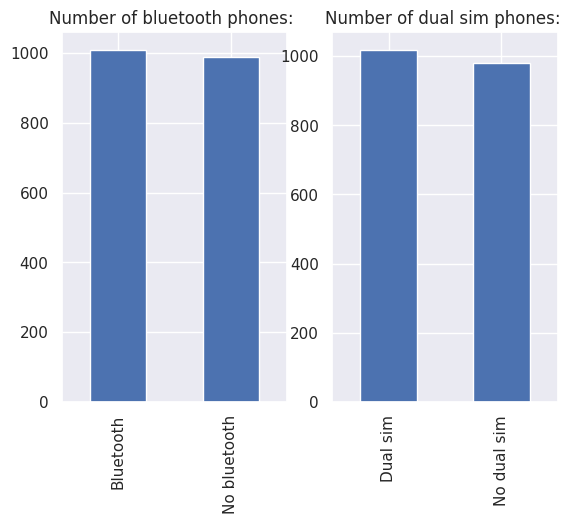

In [11]:
#Number of bluetooth phones and dual sim phones:
plt.subplot(1,2,1)
data["blue"].value_counts().plot(kind="bar")
plt.title("Number of bluetooth phones: ")
plt.xticks(ticks=(1,0),labels=["No bluetooth","Bluetooth"]);
plt.subplot(1,2,2)
data["dual_sim"].value_counts().plot(kind="bar")
plt.title("Number of dual sim phones: ")
plt.xticks(ticks=(1,0),labels=["No dual sim","Dual sim"]);
plt.show()

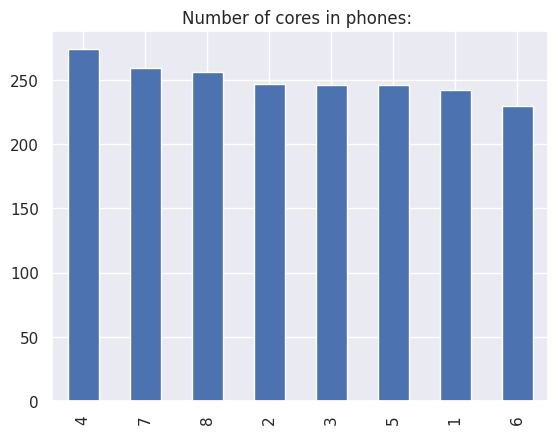

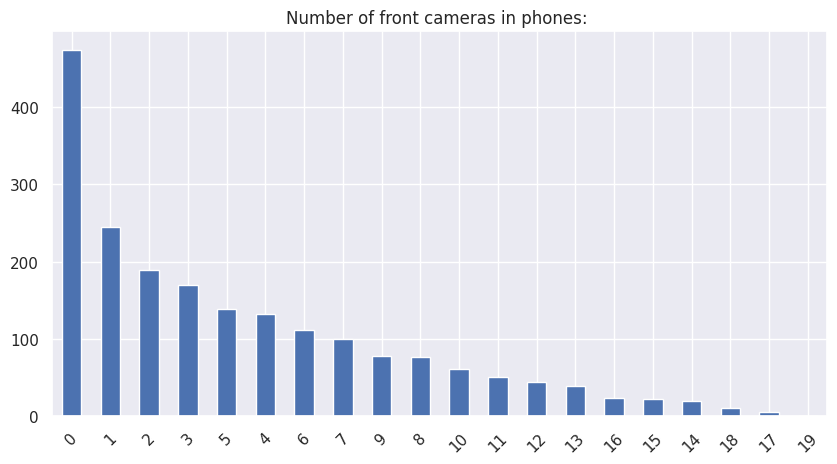

In [12]:
#Number of cores and front cameras in phones:
data["n_cores"].value_counts().plot(kind="bar")
plt.title("Number of cores in phones: ")

plt.figure(figsize = (10,5))
data["fc"].value_counts().plot(kind="bar")
plt.title("Number of front cameras in phones: ")
plt.xticks(rotation = 45)
plt.show()

<Axes: >

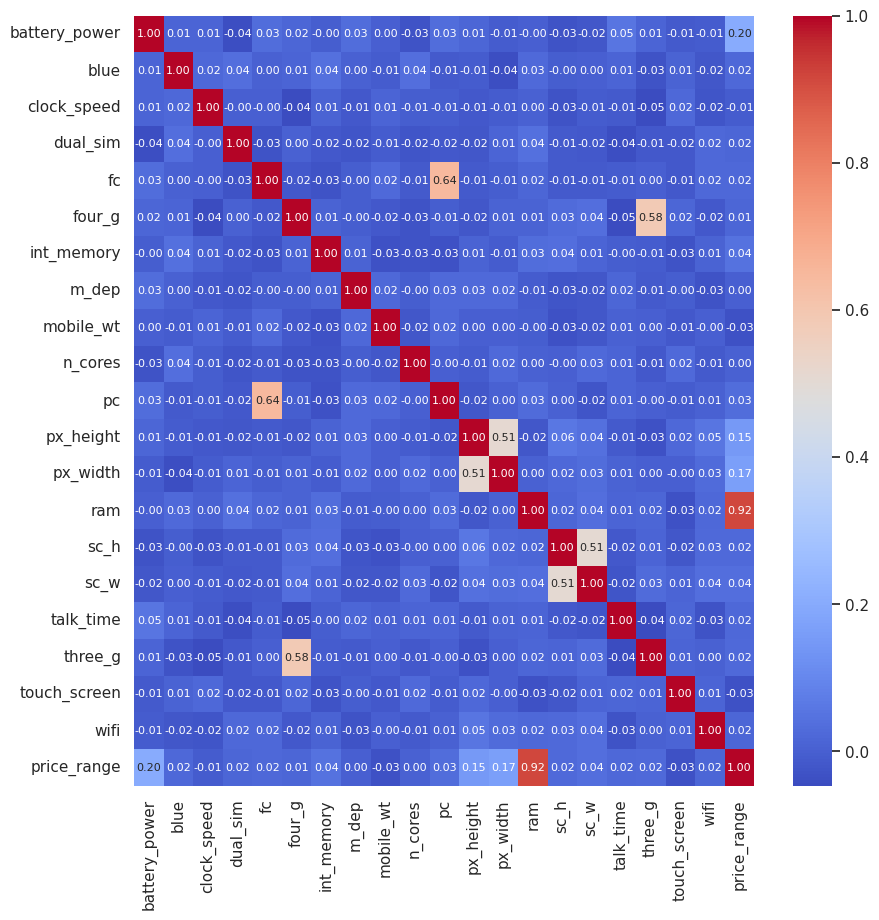

In [13]:
#Correlation:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm", annot_kws = {"size":8}, fmt = ".2f")

In [14]:
X = data.drop("price_range", axis = 1)
y = data["price_range"]
#Training the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": [2, 3, 5, 7, 9, 10, 15, 20]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_["n_neighbors"]
print(best_k)

9


In [38]:
#Importing classifier from sklearn:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [39]:
#Predictions:
y_pred = knn_classifier.predict(X_test)
#Accuracy:
accuracy = knn_classifier.score(X_test, y_test)*100
print(accuracy,"%")

95.5 %


Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.93      0.95      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.94      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



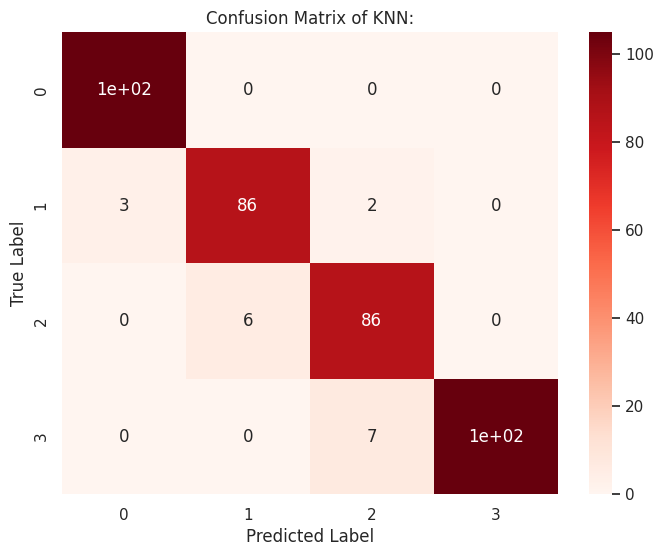

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of KNN:")
plt.show()